In [50]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import re
import plotly.figure_factory as ff
import matplotlib as plt

In [51]:
src_folder = r"C:\Users\faiqh\Documents\Slow Strain CSV Stages"
files = os.listdir(src_folder)
data = pd.read_csv(os.path.join(src_folder, "Stage 31.csv"))
print(data)

          Unnamed: 0      Timestep      DEPT   SSTR
0                  1  190819132359 -21980.64   2.46
1                  2  190819132359 -21977.29   2.45
2                  3  190819132359 -21973.94 -30.30
3                  4  190819132359 -21970.59 -30.16
4                  5  190819132359 -21967.24 -31.29
...              ...           ...       ...    ...
98096635        6780  190819172458    726.16   0.90
98096636        6781  190819172458    729.51   0.48
98096637        6782  190819172458    732.86   0.36
98096638        6783  190819172458    736.21   0.28
98096639        6784  190819172458    739.56   0.34

[98096640 rows x 4 columns]


In [52]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.drop(data[data.SSTR < 1 ].index, inplace=True)
data.drop(data[data.SSTR > 25 ].index, inplace=True)
data.drop(data[data.DEPT > -8000 ].index, inplace=True)

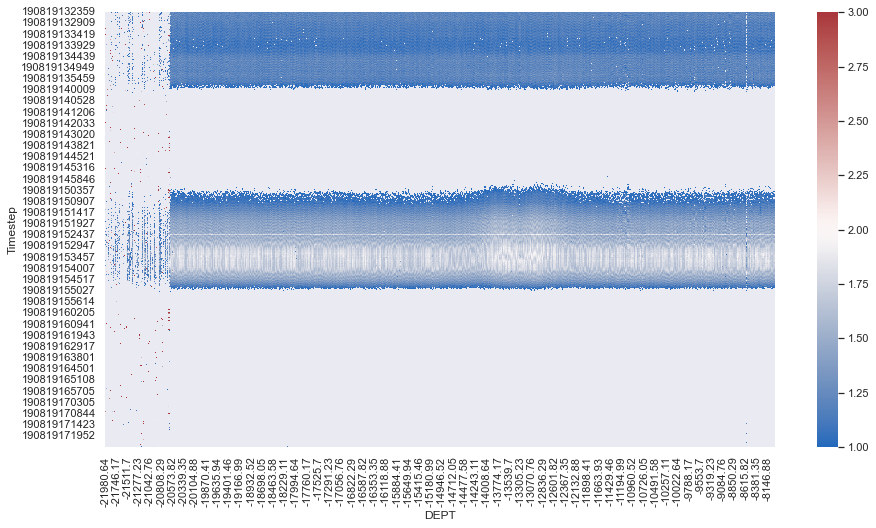

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
heatmap_data = pd.pivot_table(data, values = "SSTR", index = "Timestep", columns = "DEPT")
sns.color_palette("vlag", as_cmap=True)
ax = sns.heatmap(heatmap_data, vmin = 1, vmax = 3, cmap = "vlag")
fig = ax.get_figure()
fig.savefig("Stage 31.png", dpi = 300)
